In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [10]:
df = pd.read_excel(r"C:\Users\Prerana\OneDrive\Desktop\LadakiBahin\Shirol_with_Age.xlsx")

# print rows, columns
print(df.shape)


(6170, 10)


In [11]:
df.head(5) #preview first 5 rows

,District,Taluka,Taluka Village,Address,pincode,Benificiary Name,Applciation No,Aadhar No,Benificiary Contact No,Age
0,Kolhapur,Shirol,NaN,KUMBHAR GALLI NEAR DATTA MANDIR BILASHI,416113,CHHAYA NATHURAM KUMBHAR,NYS-01252954-668e01ade900c,XXXXXXXX3320,8459238656,59
1,Kolhapur,Shirol,NaN,"पत्ता पती/चैतन कल्लाप्पा मोळे, बस्ती गल्ली, मा...",416105,स्मिता चैतन मोळे,NYS-03479507-669484e6407984009,XXXXXXXX6553,7499464774,49
2,Kolhapur,Shirol,NaN,शिरगाव रस्ता कोथळी,416101,अश्विनी प्रकाश सनदी,NYS-11779019-66a373a82b4847953,XXXXXXXX5589,9665637142,35
3,Kolhapur,Shirol,NaN,"vishrambag,biur,sangali,shirala",416101,Archana Uttam Patil,NYS-06812085-669a4842ba42d3892,XXXXXXXX7764,9370519589,63
4,Kolhapur,Shirol,NaN,Takaliwadi,416108,Natasha Dnyaneshwar Nirmale,NYS-09519430-669f5d5206c0a9245,XXXXXXXX5822,7756020992,28


In [12]:
print(df.columns)#column names

Index(['District', 'Taluka', 'Taluka Village', 'Address', 'pincode',
       'Benificiary Name', 'Applciation No', 'Aadhar No',
       'Benificiary Contact No', 'Age'],
      dtype='object')


In [13]:
df.info()#datatypes and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170 entries, 0 to 6169
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                6170 non-null   object 
 1   Taluka                  6170 non-null   object 
 2   Taluka Village          0 non-null      float64
 3   Address                 6170 non-null   object 
 4   pincode                 6170 non-null   int64  
 5   Benificiary Name        6170 non-null   object 
 6   Applciation No          6170 non-null   object 
 7   Aadhar No               6170 non-null   object 
 8   Benificiary Contact No  6170 non-null   object 
 9   Age                     6170 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 482.2+ KB


In [14]:
df = df.drop_duplicates()



Top 10 Pincodes:
pincode
416101    1597
416106     834
416103     546
416143     519
416107     430
416121     426
416102     338
416104     290
416120     286
416105     285
Name: count, dtype: int64


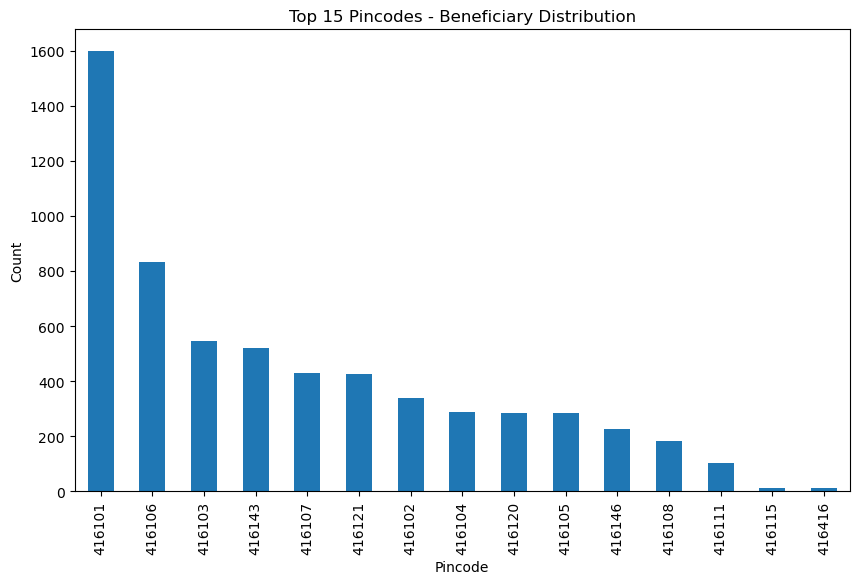

In [15]:
pincode_counts = df["pincode"].value_counts().sort_values(ascending=False)
print("\nTop 10 Pincodes:")
print(pincode_counts.head(10))

# Plot Pincode distribution
plt.figure(figsize=(10,6))
pincode_counts.head(15).plot(kind="bar")
plt.title("Top 15 Pincodes - Beneficiary Distribution")
plt.xlabel("Pincode")
plt.ylabel("Count")
plt.show()

 Pincode-wise Distribution  
We analyze the **top pincodes** where beneficiaries are concentrated.  

- Helps understand **geographical reach** of the scheme  
- Identifies areas with the **highest number of applicants**  


In [8]:
# Check language distribution
def detect_language(text):
    if isinstance(text, str):
        # Simple heuristic: check for Devanagari characters
        if any('\u0900' <= char <= '\u097F' for char in text):
            return 'Marathi'
    return 'English'


In [9]:
# Apply language detection
df['Name_Language'] = df['Benificiary Name'].apply(detect_language)
df['Address_Language'] = df['Address'].apply(detect_language)

print("Language Distribution in Names:")
print(df['Name_Language'].value_counts())

print("Language Distribution in Addresses:")
print(df['Address_Language'].value_counts())

Language Distribution in Names:
Name_Language
English    4503
Marathi    1667
Name: count, dtype: int64
Language Distribution in Addresses:
Address_Language
English    4513
Marathi    1657
Name: count, dtype: int64


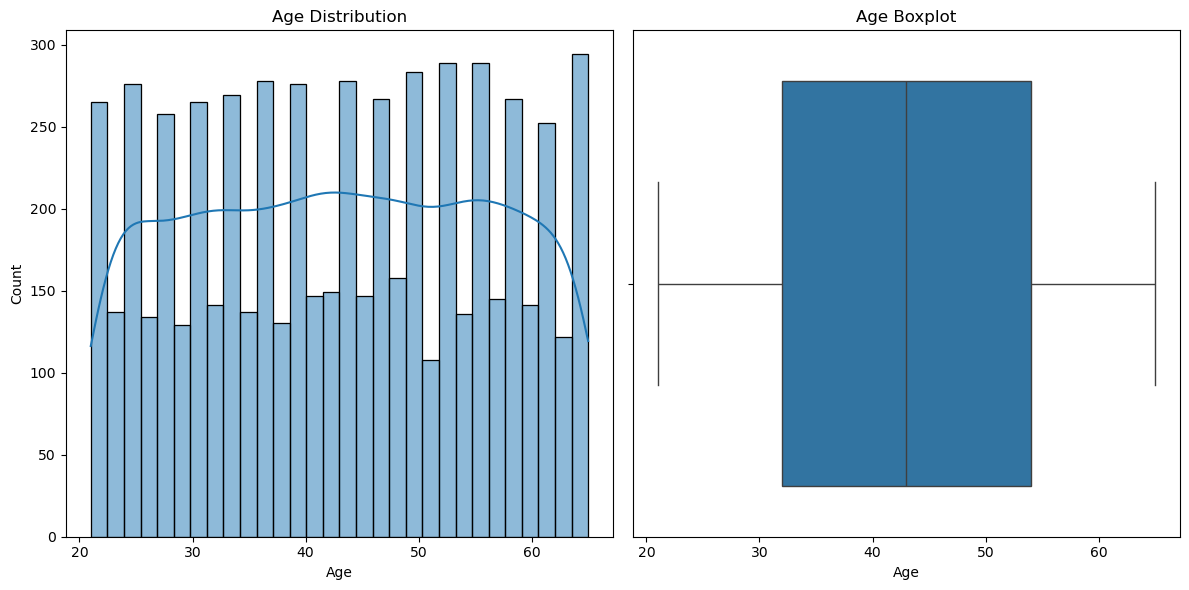

Age Statistics:
Mean Age: 43.11
Median Age: 43.0
Youngest: 21
Oldest: 65
Standard Deviation: 12.91


In [18]:
# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Age distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title('Age Boxplot')
plt.tight_layout()
plt.show()
# Age statistics
print("Age Statistics:")
print(f"Mean Age: {df['Age'].mean():.2f}")
print(f"Median Age: {df['Age'].median()}")
print(f"Youngest: {df['Age'].min()}")
print(f"Oldest: {df['Age'].max()}")
print(f"Standard Deviation: {df['Age'].std():.2f}")

##  Visualization: Age Distribution & Boxplot

This analysis explores the **distribution of applicant ages**.  
- The **histogram** shows how ages are spread across the dataset.  
- The **boxplot** highlights the spread, median, and potential outliers.  

In [20]:
# Generate comprehensive report
def generate_demographic_report(df):
    report = {
        'total_records': len(df),
        'age_stats': {
            'mean': df['Age'].mean(),
            'median': df['Age'].median(),
            'min': df['Age'].min(),
            'max': df['Age'].max(),
            'std': df['Age'].std()
        },
        'pincode_coverage': df['pincode'].nunique(),
        'top_pincodes': df['pincode'].value_counts().head(5).to_dict(),
        'language_distribution_names': df['Name_Language'].value_counts().to_dict(),
        'language_distribution_address': df['Address_Language'].value_counts().to_dict(),
        'age_groups': pd.cut(df['Age'], bins=[0, 18, 30, 40, 50, 60, 100], 
                            labels=['0-18', '19-30', '31-40', '41-50', '51-60', '60+']).value_counts().to_dict()
    }
    return report

demographic_report = generate_demographic_report(df)
print("Demographic Report:")
for key, value in demographic_report.items():
    print(f"{key}: {value}")

Demographic Report:
total_records: 6167
age_stats: {'mean': np.float64(43.11285876439111), 'median': 43.0, 'min': 21, 'max': 65, 'std': 12.906255541223336}
pincode_coverage: 68
top_pincodes: {416101: 1597, 416106: 834, 416103: 546, 416143: 519, 416107: 430}
language_distribution_names: {'English': 4500, 'Marathi': 1667}
language_distribution_address: {'English': 4510, 'Marathi': 1657}
age_groups: {'41-50': 1429, '51-60': 1375, '31-40': 1372, '19-30': 1323, '60+': 668, '0-18': 0}


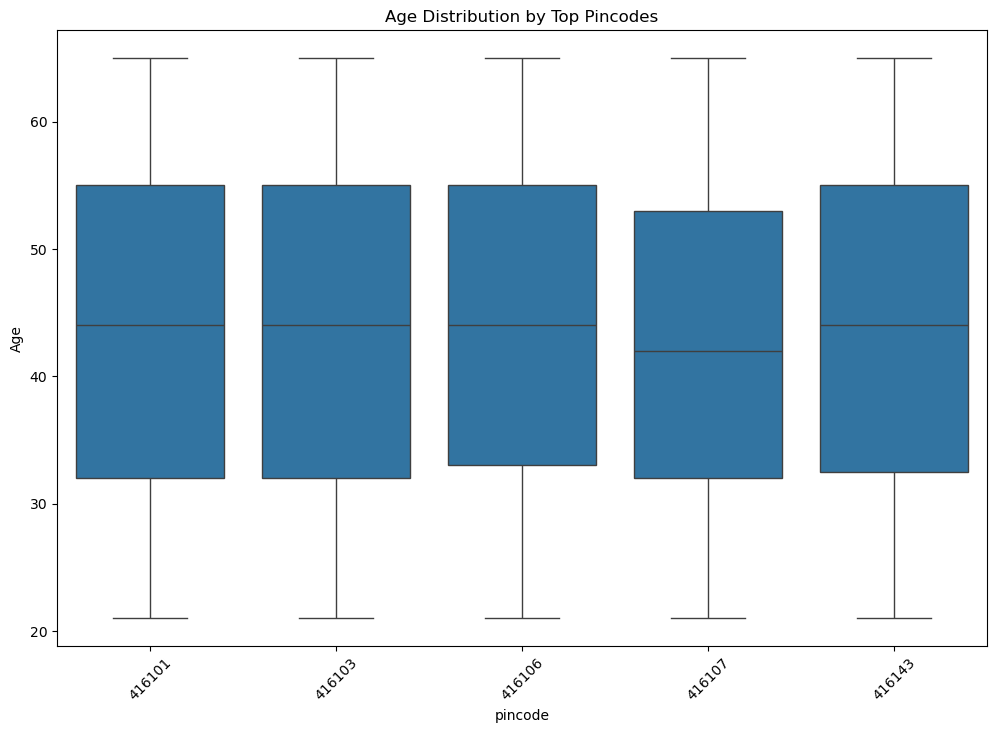

In [21]:
# Age distribution by top pincodes
top_pincodes = df['pincode'].value_counts().head(5).index.tolist()
filtered_df = df[df['pincode'].isin(top_pincodes)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='pincode', y='Age', data=filtered_df)
plt.title('Age Distribution by Top Pincodes')
plt.xticks(rotation=45)
plt.show()

In [10]:

df = pd.read_excel(r"C:\Users\Prerana\OneDrive\Desktop\LadakiBahin\Shirol_with_Age.xlsx")

# Eligibility column (Age between 21 and 60 is Eligible)
df['E
ligibility'] = df['Age'].apply(lambda x: 'Eligible' if 21 <= x <= 60 else 'Not Eligible')

# Check result
print(df[['Age', 'Eligibility']].head(10))


   Age   Eligibility
0   59      Eligible
1   49      Eligible
2   35      Eligible
3   63  Not Eligible
4   28      Eligible
5   41      Eligible
6   59      Eligible
7   39      Eligible
8   43      Eligible
9   31      Eligible


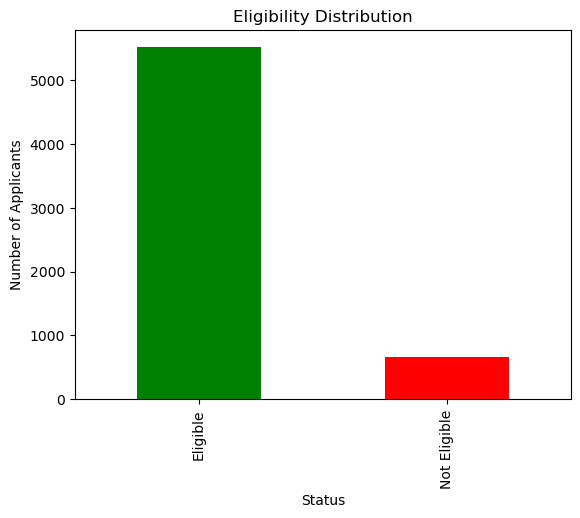

In [15]:
import matplotlib.pyplot as plt

df['Eligibility'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Eligibility Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Applicants")
plt.show()


 Eligibility Distribution  

To better understand how many applicants qualify, we plot a **bar chart** of eligibility status.  

- 🟢 Green → Eligible (Age between 21–60)  
- 🔴 Red → Not Eligible (Outside range)  

This visualization helps us quickly compare the **number of applicants who meet the age criteria** vs. those who don’t.  


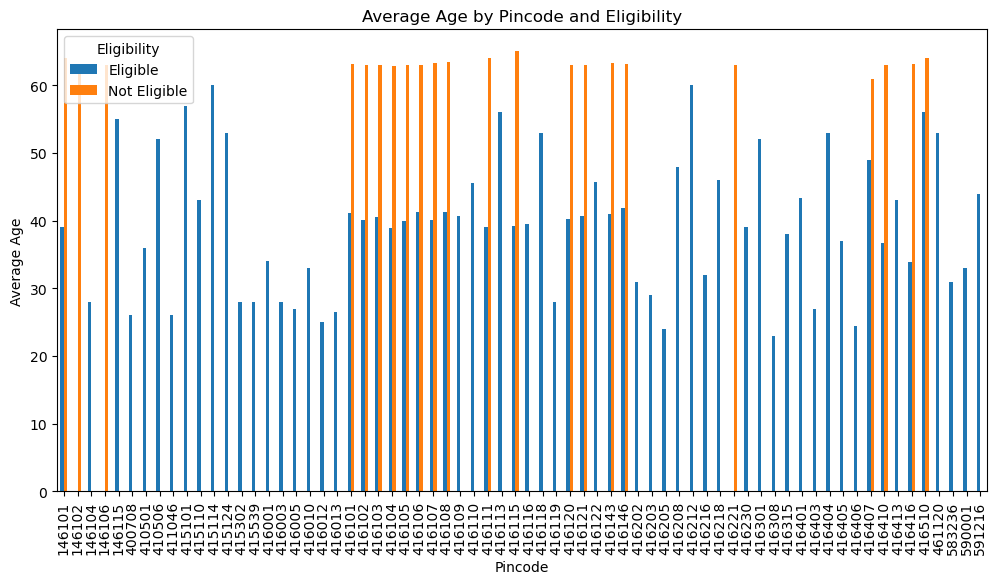

In [24]:
import matplotlib.pyplot as plt

# Group by Pincode and Eligibility → calculate average age
pincode_age_elig = df.groupby(['pincode','Eligibility'])['Age'].mean().unstack()

# Plot
pincode_age_elig.plot(kind='bar', figsize=(12,6))
plt.title("Average Age by Pincode and Eligibility")
plt.xlabel("Pincode")
plt.ylabel("Average Age")
plt.legend(title="Eligibility")
plt.show()


 Visualization: Average Age by Pincode and Eligibility
This chart shows the **average age of applicants by pincode and eligibility status**.  
- **Blue bars** → Eligible applicants  
- **Orange bars** → Not Eligible applicants  

Eligibility is higher in pincodes with younger average applicants, while areas with older age profiles show lower eligibility.



In [19]:
 df.to_excel("LadakiBahin_Cleaned_Final.xlsx", index=False)


In [25]:
df.to_excel(r"C:\Users\Prerana\Desktop\LadakiBahin_Cleaned_Final.xlsx", index=False)


In [26]:
output_path = r"C:\Users\Prerana\OneDrive\Desktop\LadakiBahin\Shirol_with_Eligibility.xlsx"
df.to_excel(output_path, index=False)

import os
print("Files in folder:")
print(os.listdir(r"C:\Users\Prerana\OneDrive\Desktop\LadakiBahin"))


Files in folder:
['Shirol 1,2 KOLHAPUR NEW URBAN - more_than_2_in_family - NYS LIST (2).xlsx', 'Shirol_with_Age.xlsx', 'Shirol_with_Eligibility.xlsx']
